### Multiple Linear (Only Least Square Model) & Generalized Logistic Regression Comparative Inherent Mechanics and Output Analysis
Build a small size dataframe features similar to charachteristics & properties of the Heart Diseases Dataset

Note: Dependent Variable = Maximum Heart Rate 

Objectives:

- Discuss inherent statistical measurements and rationale for both models
- Build & Compare a linear and logistic regression model
- Analyse and differentiate betwee model results and techniques

Goals:
##### Generate Data
Note : The data is generated on information taken from the heart disease dataset. For features names they are identicial and the numerical data genearted below is based on feature min and max values.

In [1]:
#import random package
import random

#Create empty lists with specific feature names
Age = []
BMI = []
Cholesterol = []
Trestbps = []
Thalach = []

#Create a for loop to generate data
for n in range(0,30):
    number = random.randint(29,77)
    Age.append(number)

#Create a for loop to generate data
for n in range(0,30):
    number = random.randint(17,30.0)
    BMI.append(number)
    
#Create a for loop to generate 
for n in range(0,30):
    number = random.randint(128,275)
    Cholesterol.append(number)

#Create a for loop to generate data
for n in range(0,30):
    number = random.randint(94,200)
    Trestbps.append(number)

#Create a for loop to generate data
for n in range(0,30):
    number = random.randint(71,202)
    Thalach.append(number)

#Print all list with generated data
#print('Age', Age)
#print('BMI', BMI)
#print('Cholesterol', Cholesterol)
#print('Trestbps', Trestbps)
#print('Thalach', Thalach)

##### Build Dataframe

Note : As we are going to input data into a linear regression model it is important to remember that the dependent (target) variable must contain continuous data.

As all independent variables are numerical (no categorical data) present we do not have to perfrom any encoding of the data. If categorical data was present within the independent variables we would perform dummy encoding.

In [2]:
import pandas as pd
#Create DataFrame including all above features and generated data
data = pd.DataFrame ({'Age': Age, 'Body Mass Index': BMI, 'Serum Cholesterol': Cholesterol, 
                      'Resting Blood Pressure': Trestbps, 'Maximum Heart Rate': Thalach})
#create a copy of original dataframe ...(good practice)
original_dataframe = data.copy(deep = True)
#create a copy of original datframe ...for (Logistic Regression dataframe)
LR_dataframe = data.copy(deep = True)
#head of dataframe
data.head()

#Display head of dataframe, dataset information, summary information & dataframe size
#display(data.head(), data.info(), data.describe(), data.shape)

,Age,Body Mass Index,Serum Cholesterol,Resting Blood Pressure,Maximum Heart Rate
0,59,21,250,115,120
1,42,25,242,192,174
2,76,21,247,139,167
3,52,26,224,151,175
4,35,21,236,107,196


##### Correlation Analysis

Note : It is important to differentiate between the following statistical measurements covariance and correlation. 

Covariance refers to the linear association between two variables. A positive value indicates a direct or increasing linear relationship. A negative value indicates a decreasing relationship. Covariance indicates nothing about the strength of the relationship. Covariance has no upper or lower bound its scale is dependent on the two vairables in question.

Correlation refers to the linear association between two variables similarly to covariance however correlation provides both the direction and strength of the relationship. Correlation as always between zero and one in its scale is independent of the two variables in question.

In [3]:
#Correlation check between all variables
correlation = data.corr()
correlation

,Age,Body Mass Index,Serum Cholesterol,Resting Blood Pressure,Maximum Heart Rate
Age,1.000000,0.255189,-0.108133,0.069703,-0.117518
Body Mass Index,0.255189,1.000000,-0.247696,0.218034,-0.180991
Serum Cholesterol,-0.108133,-0.247696,1.000000,-0.151791,0.396676
Resting Blood Pressure,0.069703,0.218034,-0.151791,1.000000,0.061351
Maximum Heart Rate,-0.117518,-0.180991,0.396676,0.061351,1.000000


For Linear regression highly correlated independent variables can cause multicolinearity within the algorithim. It is good practice to use a scatterplot to visualize this along with the above check which can help analyse this plausible dilemma.
A threshold value should be set in advance of this check and if the threshold is surpasses opt to remove one of the set correlated variables.

In contrast for linear regression it is ideal if independent variables are correlated with the dependent (target) variable.

##### Splitting Data into Train Test Partitions

As the dataframe we are using for experimentation reasons is off small scale we will utilize a 50/50 train test split. The model will train on the labelled training data and test on the unseen labelled testing data.The training data will be increased normally when the dataset is of a large scale for example ( train 80: test 20) dependent on domain and domain problem.

In [4]:
#Train Test Split 
from sklearn.model_selection import train_test_split

#Performing train test split on the dataframe
train, test = train_test_split(data,test_size = 0.5,random_state=31)
#Declare Dependent Variable (Target Variable)
X_train = train.drop(['Maximum Heart Rate'],axis=1)
y_train = train.filter(['Maximum Heart Rate'])
X_test = test.drop(['Maximum Heart Rate'],axis=1)
y_test = test.filter(['Maximum Heart Rate'])

##### Linear Regression Model (OLS Model)
Key Difference between a Linear & Logisitc Regression Model, is in linear regression the dependent variable will be continuous numeric data in which one or more quantitative variables will be predicting another. For the logistic regression the dependent variable is categorical. The output of the logisitc regression model will be a probability. Remember with probabilites they must be between 0 and 1.

In [5]:
#Import statsmodels module
import statsmodels.api as sm

#Initialize the OLS model
##Training the OLS model on segregated training data
model = sm.OLS(y_train,X_train)
#Testing the OLS model on segragated test data
results = model.fit()

##### Result Analysis

In [6]:
#Display Intercept
display(results.params[0])
#Display Intercept
display(results.params[1])

#Extracting result metrics
print('Parameters: ', results.params)
print('Standard errors: ', results.bse)
print('Predicted values: ', results.predict())

0.5288761485794273

-0.7396437840856329

Parameters:  Age                       0.528876
Body Mass Index          -0.739644
Serum Cholesterol         0.562479
Resting Blood Pressure    0.053875
dtype: float64
Standard errors:  Age                       0.606149
Body Mass Index           2.023972
Serum Cholesterol         0.173355
Resting Blood Pressure    0.295277
dtype: float64
Predicted values:  [150.1855107  107.48939554 142.93261982  95.02498482 169.79108747
 166.03270297 114.83199701 162.53105824 154.95839306 148.356464
 119.98817985 171.08290812 162.63080704 146.47876767 149.33972957]


In [7]:
#Create DataFrame including result parameters, standard errors and predicted values
Model_Results = pd.DataFrame ({'Model Coefficients': results.params, 'Result Standard Errors': results.bse})
#Create DataFrame including the models predicted values
Predicted_Values = pd.DataFrame ({'Models Predicted Values': results.predict()})

#display 
display(Model_Results , Predicted_Values)

,Model Coefficients,Result Standard Errors
Age,0.528876,0.606149
Body Mass Index,-0.739644,2.023972
Serum Cholesterol,0.562479,0.173355
Resting Blood Pressure,0.053875,0.295277


,Models Predicted Values
0,150.185511
1,107.489396
2,142.932620
3,95.024985
4,169.791087
5,166.032703
6,114.831997
7,162.531058
8,154.958393
9,148.356464


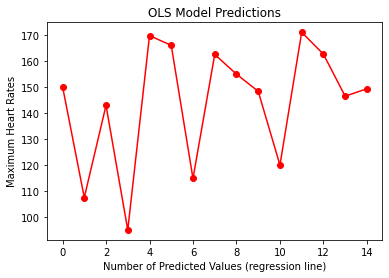

In [8]:
import matplotlib.pyplot as plt

#Plot the OLS regression line
plt.plot(results.predict(),'-o', color = 'r')
plt.xlabel('Number of Predicted Values (regression line)')
plt.ylabel('Maximum Heart Rates')
plt.title('OLS Model Predictions')
plt.show()

In [9]:
#Summary Report
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:     Maximum Heart Rate   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              69.61
Date:                Thu, 06 May 2021   Prob (F-statistic):                    9.72e-08
Time:                        13:36:50   Log-Likelihood:                         -71.797
No. Observations:                  15   AIC:                                      151.6
Df Residuals:                      11   BIC:                                      154.4
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

C:\Users\Dean_\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


##### Logistic Regression Model
As highlighted above the key difference between linear and logisitc rgeression lies with our dependent variable. For logisitc regression tehe target dependent (target) variable must be categorical.

Logisitic regression seeks to:
- model the probability of an event occuring depending on the values of the independent variables which can be categorical(encoded) or numerical.
- estinate the probaility that an event occurs for a randomly selected observation versus the probaility that the event does not occur.
- predict the effect of a series of variables on a binaryresponse variable
- classify observations by estimating the probability that an observation is in a particular categiry such as an event occuring not occuring.

##### Feature Engineering

We will chose the above target variable (Maximum Heart Rate) used for the linear regression model as the target variable. However, we need to perfrom some feature engineering on the variable to bin the continuos data creating a binary (dichotomous) variable for the coming logisitc regression model.

In [10]:
#Data Head (Unengineered), summary statistics
display(LR_dataframe.head(), LR_dataframe.describe())

,Age,Body Mass Index,Serum Cholesterol,Resting Blood Pressure,Maximum Heart Rate
0,59,21,250,115,120
1,42,25,242,192,174
2,76,21,247,139,167
3,52,26,224,151,175
4,35,21,236,107,196


,Age,Body Mass Index,Serum Cholesterol,Resting Blood Pressure,Maximum Heart Rate
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,54.833333,23.300000,211.766667,152.033333,151.500000
std,14.178866,3.435615,42.421273,28.895153,37.570853
min,30.000000,17.000000,135.000000,98.000000,71.000000
25%,43.000000,21.000000,176.250000,129.750000,131.500000
50%,55.500000,23.500000,222.000000,150.000000,152.000000
75%,67.750000,26.000000,245.000000,180.250000,177.250000
max,77.000000,29.000000,269.000000,196.000000,202.000000


Looking specifically at the target variable (maximum heart rate) summary statistics this helps determine which data will be collapsed into which category. The midpoint is 138.0. Anything greater than this will proceed into category 1, all other will proceed into category 1 (< = 138.0).

In [11]:
import numpy as np

#collpasing data into categories
range = [0,138.0, np.inf]
category_names = ['Low Heart Rate','High Heart Rate']
LR_dataframe['Maximum Heart Rate'] = pd.cut(LR_dataframe['Maximum Heart Rate'], bins = range, labels = category_names)
#confirm feature engineering into categories
print(LR_dataframe['Maximum Heart Rate'].value_counts())

High Heart Rate    19
Low Heart Rate     11
Name: Maximum Heart Rate, dtype: int64


##### Splitting Data into Train Test Partitions
This process remains the same as seen for the linear regression and in this specific case we will follow the ratio for train test splits used in the libear regression model. The rationale is the same. 

In [12]:
#Performing train test split on the dataframe
train, test = train_test_split(LR_dataframe,test_size = 0.5,random_state=31)
#Declare Dependent Variable (Target Variable)
X_train = train.drop(['Maximum Heart Rate'],axis=1)
y_train = train.filter(['Maximum Heart Rate'])
X_test = test.drop(['Maximum Heart Rate'],axis=1)
y_test = test.filter(['Maximum Heart Rate'])

##### Logistic Regression Model

In [13]:
#importing appropriate packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# import the metrics class
from sklearn import metrics

#Developing Function
def Binary_Logisitc_Regression(iter_n):
    #Initialize LR Model
    LR = LogisticRegression(max_iter = (iter_n),
                            random_state = 31)
    #Training Model on the training Data
    LR.fit(X_train,y_train)
    #Testing Model on the test Data
    Predictions = LR.predict(X_test)
    
    #Confusion Matrix
    confussion_matrix = metrics.confusion_matrix(y_test, Predictions)
    print(confussion_matrix)
    
    #Model Evaluation
    target_names = ['class 0', 'class 1']
    print(classification_report(y_test, Predictions, target_names=target_names))
    #Other
    print("Accuracy:",metrics.accuracy_score(y_test, Predictions))
    #print("Precision:",metrics.precision_score(y_test, Predictions))
    #print("Recall:",metrics.recall_score(y_test, Predictions))

In [14]:
#Logisitc Regression (Call Function)
Binary_Logisitc_Regression(250)

[[4 7]
 [2 2]]
              precision    recall  f1-score   support

     class 0       0.67      0.36      0.47        11
     class 1       0.22      0.50      0.31         4

    accuracy                           0.40        15
   macro avg       0.44      0.43      0.39        15
weighted avg       0.55      0.40      0.43        15

Accuracy: 0.4


C:\Users\Dean_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
